In [1]:
from __future__ import print_function
import torch
import numpy as np
import matplotlib.pyplot as plt

### Intialize tensors

In [3]:
x = torch.ones(3,2)
print(x)
x = torch.zeros(3,2)
print(x)
x = torch.rand(3,2)
print(x)

tensor([[1., 1.],
        [1., 1.],
        [1., 1.]])
tensor([[0., 0.],
        [0., 0.],
        [0., 0.]])
tensor([[0.8818, 0.9652],
        [0.2636, 0.3814],
        [0.9354, 0.3166]])


In [5]:
x = torch.empty(3,2)
print(x)
y = torch.zeros_like(x)
print(y)

tensor([[1.7743e+28, 1.1673e-32],
        [7.2675e+31, 1.8892e+31],
        [5.0826e+31, 7.5338e+28]])
tensor([[0., 0.],
        [0., 0.],
        [0., 0.]])


In [8]:
x = torch.linspace(0,1,steps = 5)
print(x)

tensor([0.0000, 0.2500, 0.5000, 0.7500, 1.0000])


In [9]:
x = torch.tensor([[1,2],[3,4],[5,6]])
print(x)

tensor([[1, 2],
        [3, 4],
        [5, 6]])


### Slicing Tensors

In [11]:
print(x.size())
print(x[:,1])
print(x[0,:])

torch.Size([3, 2])
tensor([2, 4, 6])
tensor([1, 2])


In [12]:
y = x[1,1]
print(y)
print(y.item())

tensor(4)
4


### Reshaping Tensors

In [14]:
print(x)
y = x.view(2,3)
print(y)

tensor([[1, 2],
        [3, 4],
        [5, 6]])
tensor([[1, 2, 3],
        [4, 5, 6]])


In [16]:
y = x.view(6,-1)
print(y)

tensor([[1],
        [2],
        [3],
        [4],
        [5],
        [6]])


### Simple Operations

In [17]:
x = torch.ones(3,2)
y = torch.ones(3,2)
z = x + y
print(z)
z = x - y
print(z)
z = x * y
print(z)

tensor([[2., 2.],
        [2., 2.],
        [2., 2.]])
tensor([[0., 0.],
        [0., 0.],
        [0., 0.]])
tensor([[1., 1.],
        [1., 1.],
        [1., 1.]])


In [18]:
z = y.add(x)
print(z)
print(y)

tensor([[2., 2.],
        [2., 2.],
        [2., 2.]])
tensor([[1., 1.],
        [1., 1.],
        [1., 1.]])


In [19]:
z = y.add_(x)
print(z)
print(y)

tensor([[2., 2.],
        [2., 2.],
        [2., 2.]])
tensor([[2., 2.],
        [2., 2.],
        [2., 2.]])


### NUMPY <> TENSOR

In [21]:
x_np = x.numpy()
print(type(x),type(y))
print(x_np)

<class 'torch.Tensor'> <class 'torch.Tensor'>
[[1. 1.]
 [1. 1.]
 [1. 1.]]


In [22]:
a = np.random.randn(5)
print(a)
a_pt = torch.from_numpy(a)
print(type(a),type(a_pt))
print(a_pt)

[-0.66158584  0.81562205 -0.93405615  1.49402169 -0.3172612 ]
<class 'numpy.ndarray'> <class 'torch.Tensor'>
tensor([-0.6616,  0.8156, -0.9341,  1.4940, -0.3173], dtype=torch.float64)


In [23]:
np.add(a,1,out = a)
print(a)
print(a_pt)

[0.33841416 1.81562205 0.06594385 2.49402169 0.6827388 ]
tensor([0.3384, 1.8156, 0.0659, 2.4940, 0.6827], dtype=torch.float64)


In [24]:
%%time
for i in range(100):
    a = np.random.randn(100,100)
    b = np.random.randn(100,100)
    c = a+b

Wall time: 58 ms


In [25]:
%%time
for i in range(100):
    a = torch.randn(100,100)
    b = torch.randn(100,100)
    c = a+b

Wall time: 46.8 ms


In [26]:
%%time
for i in range(100):
    a = np.random.randn(100,100)
    b = np.random.randn(100,100)
    c = np.matmul(a,b)

Wall time: 96 ms


In [27]:
%%time
for i in range(100):
    a = torch.randn(100,100)
    b = torch.randn(100,100)
    c = torch.matmul(a,b)

Wall time: 64.4 ms


In [28]:
%%time
for i in range(10):
    a = np.random.randn(10000,10000)
    b = np.random.randn(10000,10000)
    c = a+b

Wall time: 1min 51s


In [29]:
%%time
for i in range(10):
    a = torch.randn(10000,10000)
    b = torch.randn(10000,10000)
    c = a+b

Wall time: 26.1 s
Parser   : 217 ms


### CUDA support

In [10]:
print(torch.cuda.device_count())

1


In [11]:
print(torch.cuda.device(0))
print(torch.cuda.get_device_name(0))

GeForce GTX 1050 Ti


In [12]:
cuda0 = torch.device('cuda:0')

In [34]:
a = torch.ones(3,2,device=cuda0)
b = torch.ones(3,2,device=cuda0)
c = a+b
print(c)

tensor([[2., 2.],
        [2., 2.],
        [2., 2.]], device='cuda:0')


In [35]:
print(a)

tensor([[1., 1.],
        [1., 1.],
        [1., 1.]], device='cuda:0')


In [37]:
%%time
for i in range(10):
    a = np.random.randn(10000,10000)
    b = np.random.randn(10000,10000)
    np.add(b,a)

Wall time: 1min 4s
Parser   : 125 ms


In [38]:
%%time
for i in range(10):
    a_cpu = torch.randn(10000,10000)
    b_cpu = torch.randn(10000,10000)
    b_cpu.add_(a_cpu)

Wall time: 17.7 s


In [40]:
%%time
for i in range(10):
    a = torch.randn(10000,10000,device=cuda0)
    b = torch.randn(10000,10000,device=cuda0)
    b.add_(a)

Wall time: 178 ms


In [41]:
%%time
for i in range(10):
    a = np.random.randn(10000,10000)
    b = np.random.randn(10000,10000)
    np.matmul(b,a)

Wall time: 4min 20s
Parser   : 108 ms


In [42]:
%%time
for i in range(10):
    a_cpu = torch.randn(10000,10000)
    b_cpu = torch.randn(10000,10000)
    torch.matmul(a_cpu,b_cpu)

Wall time: 1min 44s


In [43]:
%%time
for i in range(10):
    a = torch.randn(10000,10000,device=cuda0)
    b = torch.randn(10000,10000,device=cuda0)
    torch.matmul(a,b)

Wall time: 21.8 s


### Autograd

In [46]:
x = torch.ones(3,2,requires_grad = True)
print(x)

tensor([[1., 1.],
        [1., 1.],
        [1., 1.]], requires_grad=True)


In [47]:
y = x + 5
print(y)

tensor([[6., 6.],
        [6., 6.],
        [6., 6.]], grad_fn=<AddBackward0>)


In [48]:
z = y*y + 1
print(z)

tensor([[37., 37.],
        [37., 37.],
        [37., 37.]], grad_fn=<AddBackward0>)


In [50]:
t = torch.sum(z)
print(t)

tensor(222., grad_fn=<SumBackward0>)


In [51]:
t.backward()

In [52]:
print(x.grad)

tensor([[12., 12.],
        [12., 12.],
        [12., 12.]])


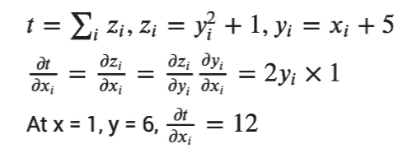

In [53]:
x = torch.ones(3,2,requires_grad=True)
y = x+5
r = 1.0/(1.0+torch.exp(-y))
print(r)
s = torch.sum(r)
s.backward()
print(x.grad)

tensor([[0.9975, 0.9975],
        [0.9975, 0.9975],
        [0.9975, 0.9975]], grad_fn=<MulBackward0>)
tensor([[0.0025, 0.0025],
        [0.0025, 0.0025],
        [0.0025, 0.0025]])


In [54]:
x = torch.ones(3,2,requires_grad=True)
y = x+5
r = 1.0/(1.0+torch.exp(-y))
a = torch.ones(3,2)

r.backward(a)
print(x.grad)

tensor([[0.0025, 0.0025],
        [0.0025, 0.0025],
        [0.0025, 0.0025]])


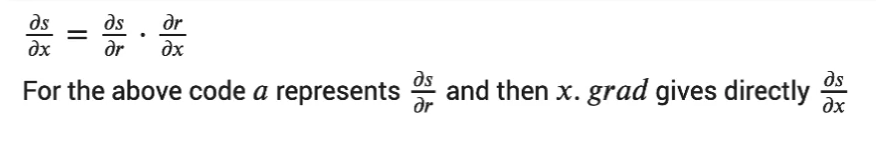

### Autograd example that looks like what we have done

In [55]:
x = torch.randn([20,1],requires_grad=True)
y = 3*x +2

In [57]:
w = torch.tensor([1.],requires_grad=True)
b = torch.tensor([1.],requires_grad=True)

y_hat = w*x + b

loss = torch.sum((y_hat - y)**2)

In [58]:
print(loss)

tensor(93.6323, grad_fn=<SumBackward0>)


In [59]:
loss.backward()

In [60]:
print(w.grad,b.grad)

tensor([-76.7921]) tensor([-33.6804])


## Do it in a loop

In [4]:
learning_rate = 0.01


## Intialising w,b
w = torch.tensor([1.],requires_grad = True)
b = torch.tensor([1.],requires_grad = True)

print(w.item(),b.item())

for i in range(10): # epochs
    
    ## Input values
    x = torch.randn([20,1])
    y = 3*x + 2
    
    ## Forward pass
    y_hat = w*x + b
    loss = torch.sum((y_hat - y)**2)
    
    
    ## Backward pass
    loss.backward()
    
    with torch.no_grad():
        w -= learning_rate*w.grad
        b -= learning_rate*b.grad
        
        
        ## Setting back to zero
        w.grad.zero_()
        b.grad.zero_()
        
    print(w.item(),b.item())

1.0 1.0
1.4364302158355713 1.457393765449524
1.9440332651138306 1.7037795782089233
2.3403067588806152 1.863743543624878
2.66182541847229 1.874245285987854
2.765320301055908 1.894193410873413
2.9050512313842773 1.9552942514419556
2.9382104873657227 1.9671809673309326
2.953552007675171 1.9788494110107422
2.962477922439575 1.9866479635238647
2.988797664642334 1.9986802339553833


### Do it for a large problem

In [14]:
%%time
learning_rate = 0.001
N = 1000000
epochs = 200

w = torch.rand([N],requires_grad=True)
b = torch.rand([1],requires_grad=True)

#print(torch.mean(w).item(),b.item())

for i in range(epochs):
    
    x = torch.randn([N])
    y = torch.dot(3*torch.ones([N]),x) - 2
    
    y_hat = torch.dot(w,x) + b
    loss = torch.sum((y_hat - y)**2)
    
    loss.backward()
    
    with torch.no_grad():
        w -= learning_rate*w.grad
        b -= learning_rate*b.grad
        
        w.grad.zero_()
        b.grad.zero_()
        
    #print(torch.mean(w).item(),b.item())

Wall time: 9.38 s


In [15]:
%%time
learning_rate = 0.001
N = 1000000
epochs = 200

w = torch.rand([N],requires_grad=True,device= cuda0)
b = torch.rand([1],requires_grad=True,device= cuda0)

#print(torch.mean(w).item(),b.item())

for i in range(epochs):
    
    x = torch.randn([N],device= cuda0)
    y = torch.dot(3*torch.ones([N],device= cuda0),x) - 2
    
    y_hat = torch.dot(w,x) + b
    loss = torch.sum((y_hat - y)**2)
    
    loss.backward()
    
    with torch.no_grad():
        w -= learning_rate*w.grad
        b -= learning_rate*b.grad
        
        w.grad.zero_()
        b.grad.zero_()
        
    #print(torch.mean(w).item(),b.item())

Wall time: 658 ms
